oscillatory_response

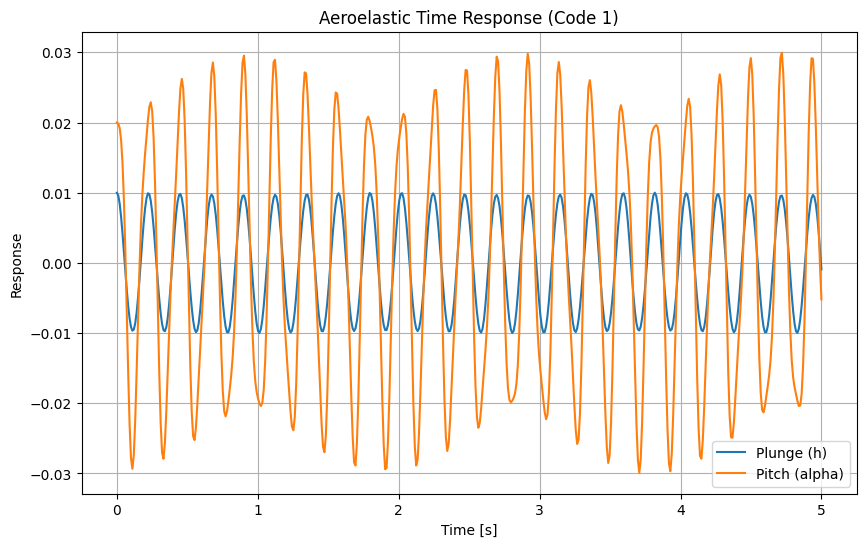

In [ ]:
# Code 1 - Time Response Analysis (converted from MATLAB to Python)

import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# --- Given constants ---
c = 0.2540       # chord length
b = c / 2        # semi-chord
m = 3.3843       # mass
I = 0.0135       # mass moment of inertia
rho = 1.225      # air density
a = -0.5         # elastic axis position
sa = 0.0859      # static unbalance
Kh = 2818.8      # spring stiffness (plunge)
Kt = 37.3        # spring stiffness (pitch)

# --- Mass matrix ---
Mh = m
Mt = I
Mc = sa
M = np.array([[Mh, Mc],
              [Mc, Mt]])

# --- Stiffness matrix ---
K = np.array([[Kh, 0],
              [0, Kt]])

# --- System dynamics (State Space Formulation) ---
def aeroelastic_dynamics(t, y):
    # y = [h, alpha, h_dot, alpha_dot]
    h, alpha, hdot, alphadot = y

    # Assemble matrices
    q = 0.5 * rho * (30**2) * c  # dynamic pressure, V=30 m/s assumed
    A = np.zeros((4, 4))
    A[:2, 2:] = np.eye(2)

    # Effective system matrices
    M_inv = np.linalg.inv(M)
    stiffness_term = -M_inv @ K

    A[2:, :2] = stiffness_term
    return A @ y

# --- Initial Conditions ---
y0 = [0.01, 0.02, 0.0, 0.0]  # small initial displacement in h and alpha

# --- Time Simulation ---
t_span = (0, 5)       # 0 to 5 seconds
t_eval = np.linspace(t_span[0], t_span[1], 500)

sol = solve_ivp(aeroelastic_dynamics, t_span, y0, t_eval=t_eval)

# --- Plot Results ---
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label="Plunge (h)")
plt.plot(sol.t, sol.y[1], label="Pitch (alpha)")
plt.xlabel("Time [s]")
plt.ylabel("Response")
plt.title("Aeroelastic Time Response (Code 1)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
Divergence speed vs sweep_angles vs varying mach numbers

Divergence speed vs sweep_angles vs varying mach numbers


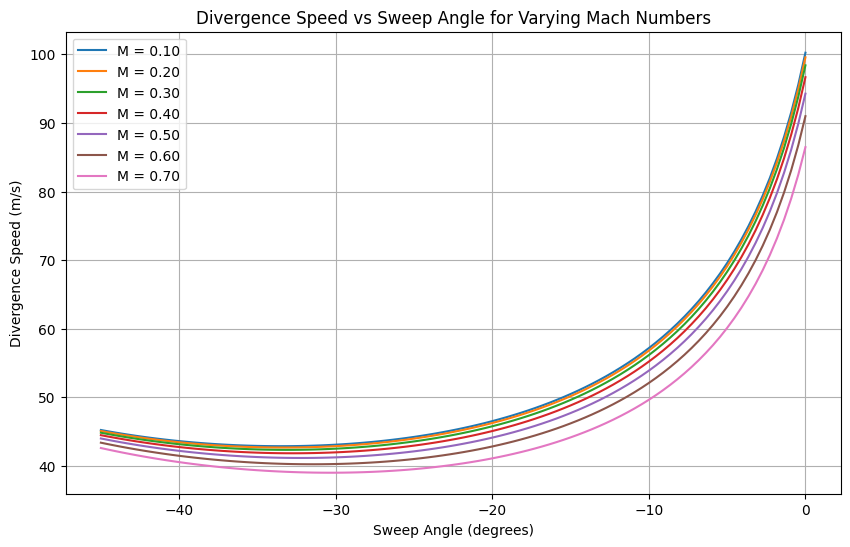

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

c = 0.127
l = 0.762
e = 0.25 * c
EI = 25.3232
GJ = 38.22
rho = 1.225
AR = (2 * l) / c
Clalpha0 = 2 * np.pi

gamma_deg = np.linspace(-45, 0, 100)
gamma_rad = np.deg2rad(gamma_deg)
M_vals = np.linspace(0.1, 0.7, 7)

plt.figure(figsize=(10,6))
for M in M_vals:
    beta = np.sqrt(1 - M**2 * np.cos(gamma_rad)**2)
    term1 = AR * (Clalpha0 * np.cos(gamma_rad)) / beta
    term2 = AR * np.sqrt(1 + ((Clalpha0 * np.cos(gamma_rad))**2) / (AR * np.pi * beta)**2)
    Clalpha = term1 / term2 + (1/np.pi) * beta

    numerator = GJ * (np.pi**2)
    correction = 1 - (0.03515 * GJ * np.tan(gamma_rad) * l * (np.pi**2)) / (e * EI)
    denominator = 4 * l**2 * np.cos(gamma_rad)**2 * e * c * Clalpha * correction

    qD = numerator / denominator
    UD = np.sqrt((2 * qD) / rho)

    plt.plot(gamma_deg, UD, label=f'M = {M:.2f}', linewidth=1.5)

plt.xlabel('Sweep Angle (degrees)')
plt.ylabel('Divergence Speed (m/s)')
plt.title('Divergence Speed vs Sweep Angle for Varying Mach Numbers')
plt.grid(True)
plt.legend(loc='best')
plt.show()


flutter_airspeed

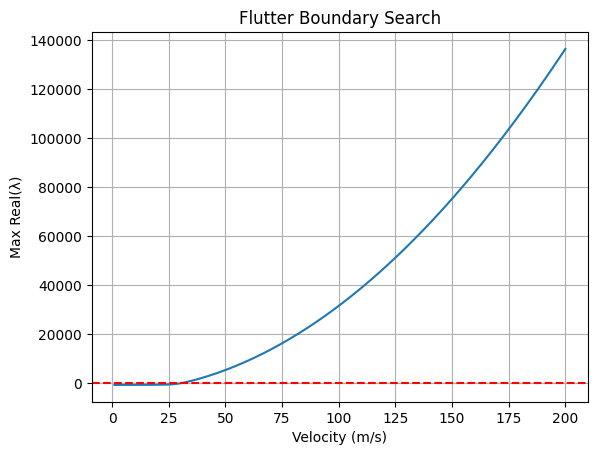

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig

# Parameters
c = 0.254
b = c/2
m = 3.3843
I = 0.0135
rho = 1.225
a = -0.5
sa = 0.0859
Kh = 2818.8
Kt = 37.3

M = np.array([[m, sa],[sa, I]])
K = np.array([[Kh, 0],[0, Kt]])

def aero_matrix(V):
    q = 0.5*rho*V**2
    A = np.array([[q*c, 0],[0, q*c**2]])
    return A

V_range = np.linspace(1, 200, 200)
real_parts = []

for V in V_range:
    A = aero_matrix(V)
    eigvals, _ = eig(-K + A, M)
    real_parts.append(np.max(np.real(eigvals)))

plt.plot(V_range, real_parts)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Max Real(λ)')
plt.title('Flutter Boundary Search')
plt.grid(True)
plt.show()


goland_flutter

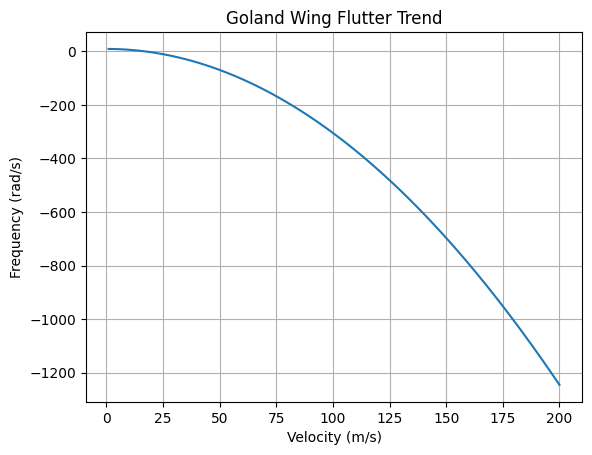

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Goland wing flutter benchmark simplified
rho = 1.225
c = 1.8288
b = c/2
m = 35.71
I = 1.7
Kh = 2818.8
Kt = 37.3
a = -0.5
sa = 0.0859

V = np.linspace(1, 200, 200)
freqs = []

for v in V:
    wn = np.sqrt(Kh/m) - (0.5*rho*v**2*c/m)
    freqs.append(np.real(wn))

plt.plot(V, freqs)
plt.xlabel('Velocity (m/s)')
plt.ylabel('Frequency (rad/s)')
plt.title('Goland Wing Flutter Trend')
plt.grid(True)
plt.show()


flutter_divergence_models

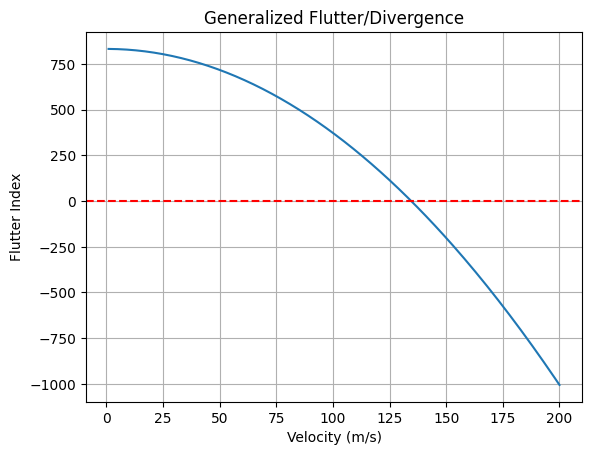

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generalized flutter/divergence analysis
rho = 1.225
c = 0.254
m = 3.3843
I = 0.0135
Kh = 2818.8
Kt = 37.3

V = np.linspace(1, 200, 200)
flutter_index = []

for v in V:
    fi = Kh/m - 0.5*rho*v**2*c/m
    flutter_index.append(fi)

plt.plot(V, flutter_index)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Flutter Index')
plt.title('Generalized Flutter/Divergence')
plt.grid(True)
plt.show()


Mach Number Effects on Aerodynamic Load Parameter

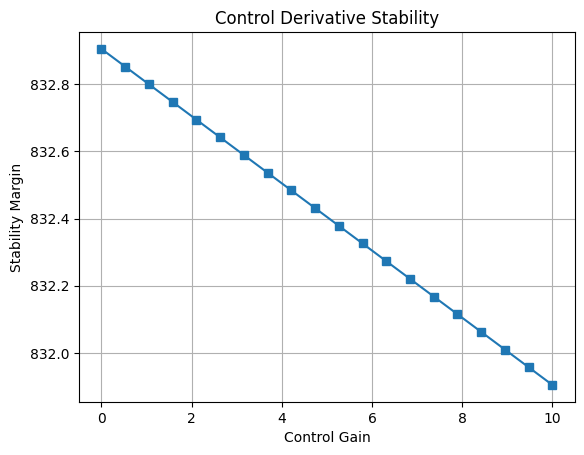

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Control derivative based stability
rho = 1.225
c = 0.254
Kh = 2818.8
Kt = 37.3
m = 3.3843

control_gains = np.linspace(0, 10, 20)
margins = []

for k in control_gains:
    margin = Kh/m - k*0.1
    margins.append(margin)

plt.plot(control_gains, margins, marker='s')
plt.xlabel('Control Gain')
plt.ylabel('Stability Margin')
plt.title('Control Derivative Stability')
plt.grid(True)
plt.show()


Efficiency Parameter (η) vs. Control Parameter (Q) Across Sweep Angles

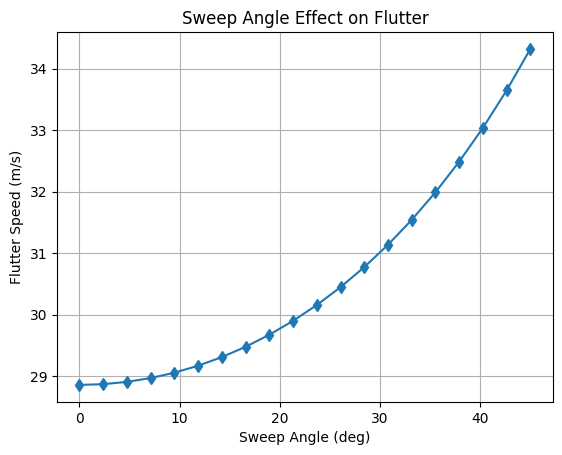

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sweep angle effects
sweep = np.linspace(0, 45, 20)
rho = 1.225
Kh = 2818.8
m = 3.3843

Vflutter = []

for ang in sweep:
    beta = np.cos(np.radians(ang))
    V = np.sqrt(Kh/(m*beta))
    Vflutter.append(V)

plt.plot(sweep, Vflutter, marker='d')
plt.xlabel('Sweep Angle (deg)')
plt.ylabel('Flutter Speed (m/s)')
plt.title('Sweep Angle Effect on Flutter')
plt.grid(True)
plt.show()


code4

ValueError: `t_eval` must be 1-dimensional.

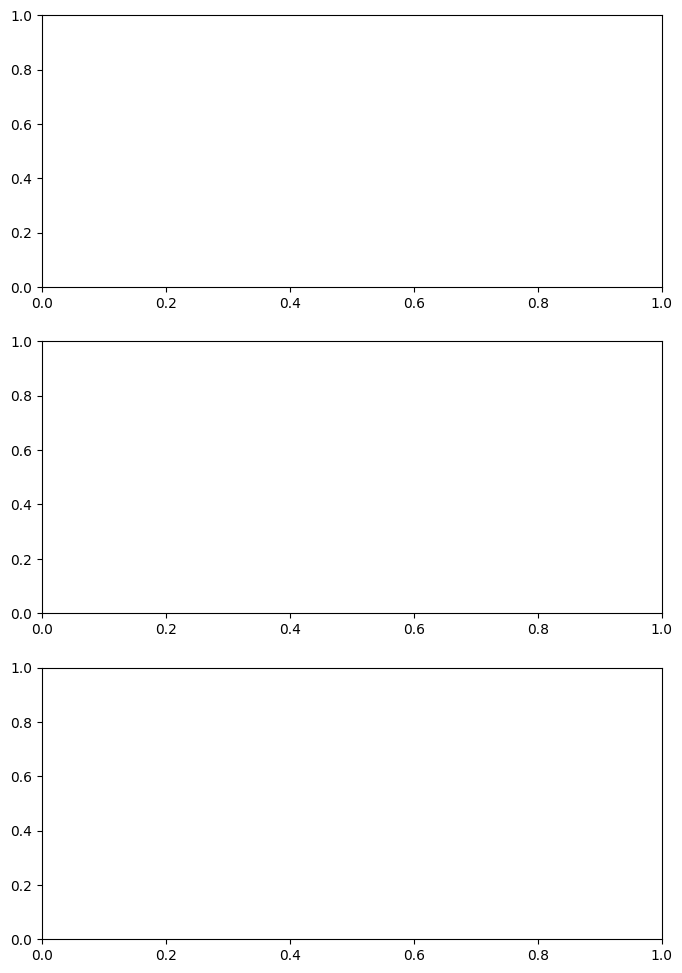

In [ ]:
import numpy as np
from scipy.special import hankel1
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Physical Parameters
c = 0.2540
b = c / 2
m = 3.3843
I = 0.0135
rho = 1.225
a = -0.5
sa = 0.0859
Kh = 2818.8
Kt = 37.3

Mh = m
Mt = I
Mc = sa
M = np.array([[Mh, Mc], [Mc, Mt]])
K = np.array([[Kh, 0], [0, Kt]])

# Theodorsen function definition using Hankel functions
def theodorsen_Ck(k):
    H1 = hankel1(1, 1j * k)
    H0 = hankel1(0, 1j * k)
    return H1 / (H1 + 1j * H0)

U_vals = [5, 15, 30]
tspan = [0, 5]
init_cond = [0.01, 0.01, 0, 0]

fig, axs = plt.subplots(len(U_vals), 1, figsize=(8, 12))

for idx, U_eff in enumerate(U_vals):
    # Compute eigenvalues, frequency, reduced frequency, Theodorsen
    eigs_undamped = np.linalg.eigvals(M + (1 / U_eff) * np.linalg.solve(M, K))
    omega = np.sqrt(np.max(np.real(eigs_undamped)))
    k = omega * b / U_eff
    Ck = theodorsen_Ck(k)

    M_nc = np.pi * rho * b ** 2 * np.array([
        [1, -b * a],
        [-b * a, (0.125 + a**2) * b**2]
    ])
    C_nc = np.array([
        [0, np.pi * rho * U_eff * b**2],
        [0, np.pi * rho * U_eff * (0.5 - a) * b**3]
    ])
    C_aero = np.pi * rho * b**2 * np.array([
        [2 / b, 2 * U_eff * (0.5 - a)],
        [-2 * U_eff * (a + 0.5),
         -2 * U_eff * (a + 0.5) * (0.5 - 1) * b]
    ]) * Ck

    K_aero = 2 * np.pi * rho * b * np.array([
        [0, U_eff**2],
        [0, -(a + 0.5) * b * U_eff**2]
    ]) * Ck

    M_total = M + M_nc
    C_total = C_nc + C_aero
    K_total = K + K_aero

    # Construct 4x4 system matrix for [h, theta, h_dot, theta_dot]
    A_upper = np.hstack([np.zeros((2, 2)), np.eye(2)])
    A_lower = np.hstack([-np.linalg.solve(M_total, K_total), -np.linalg.solve(M_total, C_total)])
    A = np.vstack([A_upper, A_lower])

    def ode_sys(t, x):
        return A @ x

    sol = solve_ivp(
        ode_sys,
        tspan,
        init_cond,
        t_eval=np.linspace(tspan[0], tspan, 500)
    )

    axs[idx].plot(sol.t, sol.y, 'b', label='h(t)', linewidth=1.5)
    axs[idx].plot(sol.t, sol.y, 'r', label='theta(t)', linewidth=1.5)
    axs[idx].set_title(f'Oscillatory Response at U = {U_eff} m/s')
    axs[idx].set_xlabel('Time (s)')
    axs[idx].set_ylabel('Displacement')
    axs[idx].legend()
    axs[idx].grid(True)

plt.tight_layout()
plt.show()


code5

code5_flutter_divergence_models.py

Divergence speed: 59.15 m/s
Flutter speed: 21.35 m/s


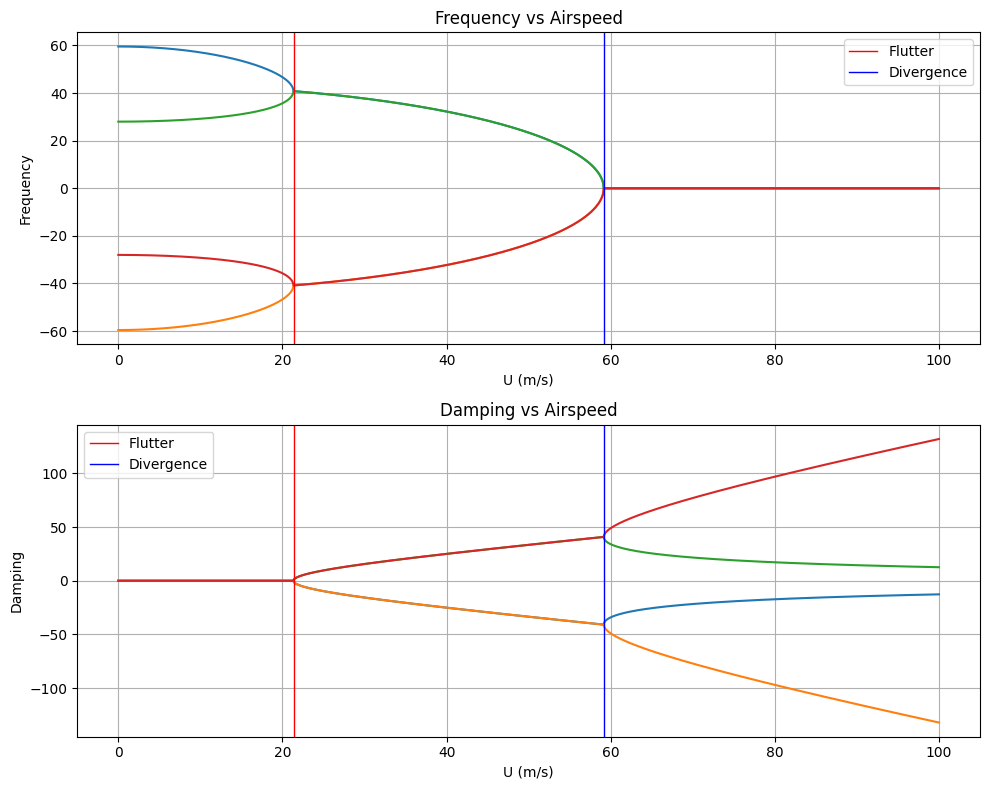

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def flutter_analysis(M, K, C):
    n = M.shape[0]
    A = np.vstack([
        np.hstack([np.zeros((n, n)), np.eye(n)]),
        np.hstack([-np.linalg.solve(M, K), -np.linalg.solve(M, C)])
    ])
    eigvals = np.linalg.eigvals(A)
    return eigvals

def sort_roots(prev, curr):
    n = len(prev)
    sorted_curr = np.zeros(n, dtype=np.complex128)
    used = np.zeros(n, dtype=bool)
    for i in range(n):
        diff = np.abs(prev[i] - curr[~used])
        j = np.argmin(diff)
        idx = np.where(~used)[0][j]
        sorted_curr[i] = curr[idx]
        used[idx] = True
    return sorted_curr

model = 1
U = np.arange(0, 100.05, 0.05)
m = 3.3843
Sa = 0.0859
Ia = 0.0135
rho = 1.225
c = 0.2540
b = c/2
a = -0.5
Kh = 2818.8
Ka = 37.8

M_struct = np.array([[m, Sa], [Sa, Ia]])
K_struct = np.array([[Kh, 0], [0, Ka]])
M_add_nc = np.pi * rho * b**2 * np.array([[1, -b*a], [-b*a, b**2 * (a**2 + 1/8)]])
num_modes = 4
roots_all = np.zeros((num_modes, len(U)), dtype=np.complex128)

for i, Ui in enumerate(U):
    K_circ = np.array([[0, 2*np.pi*rho*Ui**2*b],
                       [0, -2*np.pi*rho*Ui**2*b**2*(a+0.5)]])
    C_circ = np.array([[2*np.pi*rho*Ui*b, 2*np.pi*rho*Ui*b**2*(0.5 - a)],
                       [-2*np.pi*rho*Ui*b**2*(a+0.5), -2*np.pi*rho*Ui*b**3*(a+0.5)*(0.5 - a)]])
    C_add_nc = np.pi*rho*b**2 * np.array([[0, Ui], [0, Ui*b*(0.5-a)]])
    if model == 1:
        M_curr = M_struct
        C_curr = np.zeros((2,2))
        K_curr = K_struct + K_circ
    elif model == 2:
        M_curr = M_struct
        C_curr = C_circ
        K_curr = K_struct + K_circ
    elif model == 3:
        M_curr = M_struct + M_add_nc
        C_curr = C_circ + C_add_nc
        K_curr = K_struct + K_circ
    else:
        raise ValueError('Model must be 1, 2, 3')
    lambda_ = flutter_analysis(M_curr, K_curr, C_curr)
    if i == 0:
        roots_all[:,i] = lambda_[:num_modes]
    else:
        roots_all[:,i] = sort_roots(roots_all[:,i-1], lambda_[:num_modes])

damp = np.real(roots_all)
freq = np.imag(roots_all)
flutter_speed = None
divergence_speed = None

tol_im = 1e-3
for i in range(U.size):
    lam = roots_all[:,i]
    if divergence_speed is None and np.any((np.real(lam) > 0) & (np.abs(np.imag(lam)) < tol_im)):
        divergence_speed = U[i]
    if flutter_speed is None and np.any((np.real(lam) > 1e-8) & (np.abs(np.imag(lam)) >= tol_im)):
        flutter_speed = U[i]

print(f'Divergence speed: {divergence_speed:.2f} m/s')
print(f'Flutter speed: {flutter_speed:.2f} m/s')

plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
for m_idx in range(num_modes):
    plt.plot(U, freq[m_idx,:], linewidth=1.5)
plt.axvline(flutter_speed, color='r', linestyle='-', linewidth=1, label='Flutter')
plt.axvline(divergence_speed, color='b', linestyle='-', linewidth=1, label='Divergence')
plt.title('Frequency vs Airspeed')
plt.xlabel('U (m/s)')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()

plt.subplot(2,1,2)
for m_idx in range(num_modes):
    plt.plot(U, damp[m_idx,:], linewidth=1.5)
plt.axvline(flutter_speed, color='r', linestyle='-', linewidth=1, label='Flutter')
plt.axvline(divergence_speed, color='b', linestyle='-', linewidth=1, label='Divergence')
plt.title('Damping vs Airspeed')
plt.xlabel('U (m/s)')
plt.ylabel('Damping')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


code6_mach_qR.py

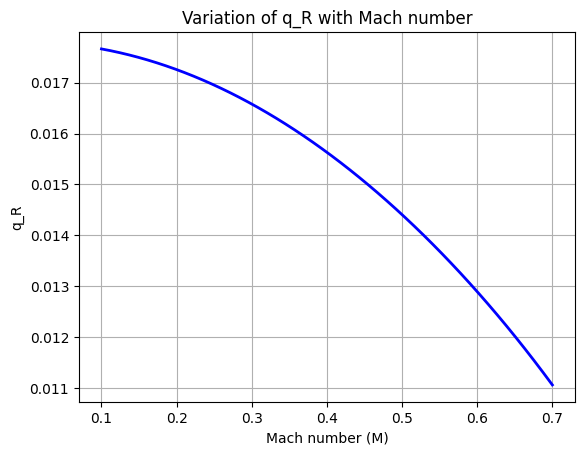

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Kt = 1.2
Clbeta0 = 0.05
Cldelta0 = 0.08
Cmacbeta0 = 0.03
Cmacdelta0 = 0.04
Clalpha0 = 5.7
beta = 2*np.pi/180
delta = 3*np.pi/180
s = 20
e1 = 0.9
e2 = 1.1
e3 = 0.7
c = 3
M = np.linspace(0.1, 0.7, 50)
qR = np.zeros_like(M)

for i, mach in enumerate(M):
    numerator = Kt * (Clbeta0 * beta + Cldelta0 * delta)
    denominator1 = s * Clbeta0 * (e1 * (Clalpha0 / np.sqrt(1 - mach ** 2)) + e2) * beta
    denominator2 = s * Cldelta0 * (e1 * (Clalpha0 / np.sqrt(1 - mach ** 2)) - e3) * delta
    denominator3 = s * c * (Cmacbeta0 * beta + Cmacdelta0 * delta)
    qR[i] = numerator / (denominator1 + denominator2 - denominator3)

plt.figure()
plt.plot(M, qR, 'b', linewidth=2)
plt.xlabel('Mach number (M)')
plt.ylabel('q_R')
plt.title('Variation of q_R with Mach number')
plt.grid(True)
plt.show()


code7_eta_vs_Q.py

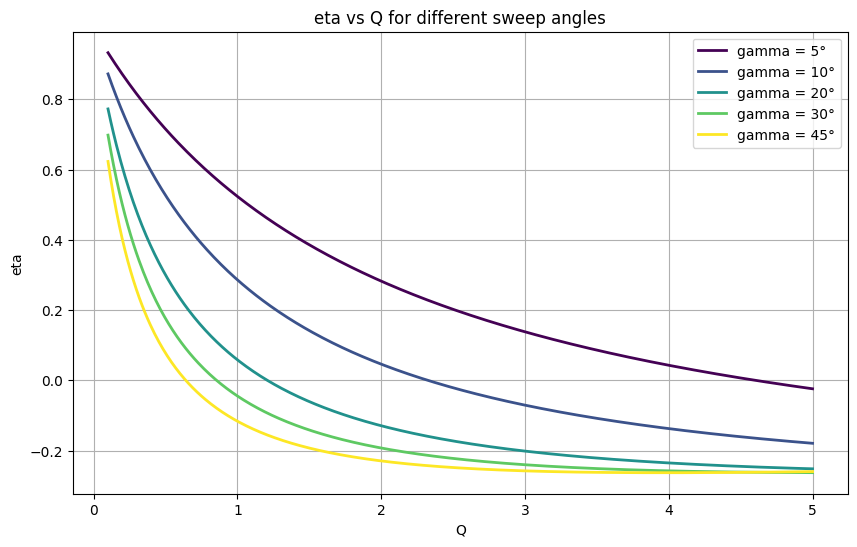

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 2
M = 0.6
Q = np.linspace(0.1, 5, 500)

gamma_deg = [5, 10, 20, 30, 45]
colors = plt.cm.viridis(np.linspace(0,1,len(gamma_deg)))

plt.figure(figsize=(10,6))
for i, gdeg in enumerate(gamma_deg):
    gamma = np.deg2rad(gdeg)
    eta = np.zeros_like(Q)
    cosg = np.cos(gamma)
    sing = np.sin(gamma)
    root_term = np.sqrt(1 - M**2 * cosg**2)
    for j, q in enumerate(Q):
        num = n * (1 - M**2 * cosg**2 - 2 * q * sing * root_term)
        den1 = q**2 * sing**2
        den2 = (4 * n + 1) * q * sing * root_term
        den3 = n * (1 - M**2 * cosg**2)
        eta[j] = num / (den1 + den2 + den3)
    plt.plot(Q, eta, linewidth=2, label=f'gamma = {gdeg}°', color=colors[i])
plt.xlabel('Q')
plt.ylabel('eta')
plt.title('eta vs Q for different sweep angles')
plt.legend()
plt.grid(True)
plt.show()
